In [1]:
# importing libraries
import pandas as pd # importing, data manipulation, subsetting
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading in the csv file 
data = pd.read_csv("US HOMOCIDE REPORT.csv")

/opt/tljh/user/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [45]:
data.isnull().sum()

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

## Getting rid of unknowns and mistakes 

In [91]:
# replacing blanks with zeros
# make a copy of the original data to keep it safe
data2 = data.copy()

# replace blank strings with zeros
data2['Perpetrator Age'] = data2['Perpetrator Age'].replace(" ", 0)

# format them as integers
data2['Perpetrator Age'] = data2['Perpetrator Age'].astype(str).astype(int)

# make zeros nan

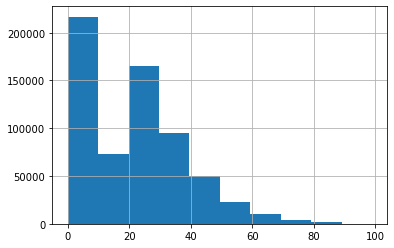

In [92]:
data2['Perpetrator Age'].hist()

In [47]:
# 216328 are 0 

In [48]:
# replacing perpetrators under the age 6 with NAN
# search for ages below 6
perp_underage = data2["Perpetrator Age"] < 6

data2["Perpetrator Age"][perp_underage] = np.nan

data2 = data2.dropna()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [49]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422000 entries, 0 to 638453
Data columns (total 24 columns):
Record ID                422000 non-null int64
Agency Code              422000 non-null object
Agency Name              422000 non-null object
Agency Type              422000 non-null object
City                     422000 non-null object
State                    422000 non-null object
Year                     422000 non-null int64
Month                    422000 non-null object
Incident                 422000 non-null int64
Crime Type               422000 non-null object
Crime Solved             422000 non-null object
Victim Sex               422000 non-null object
Victim Age               422000 non-null int64
Victim Race              422000 non-null object
Victim Ethnicity         422000 non-null object
Perpetrator Sex          422000 non-null object
Perpetrator Age          422000 non-null float64
Perpetrator Race         422000 non-null object
Perpetrator Ethnicity    422

In [50]:
vic_age_limit = data2["Victim Age"] > 99
data2["Victim Age"][vic_age_limit] = np.nan
vic_age_mean = data2["Victim Age"].mean()
data2["Victim Age"] = data2["Victim Age"].fillna(vic_age_mean)

In [51]:
data2.columns

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'],
      dtype='object')

In [52]:
vic_sex_unknown = data2["Victim Sex"] == 'Unknown'
data2["Victim Sex"][vic_sex_unknown] = np.nan
vic_sex_mode = data2["Victim Sex"].mode()
data2["Victim Sex"] = data2["Victim Sex"].fillna(vic_sex_mode)

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [76]:
vic_race_unknown = data2["Victim Race"] == 'Unknown'
data2["Victim Race"][vic_race_unknown] = np.nan
vic_race_mode = data2["Victim Race"].mode()
data2["Victim Race"] = data2["Victim Race"].fillna(vic_race_mode)

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [77]:
data2 = data2.drop('Perpetrator Ethnicity',axis=1)
data2 = data2.drop('Victim Ethnicity',axis=1)

KeyError: "['Perpetrator Ethnicity'] not found in axis"

In [78]:
perp_sex_unknown = data2["Perpetrator Sex"] == 'Unknown'
data2["Perpetrator Sex"][perp_sex_unknown] = np.nan
perp_sex_mode = data2["Perpetrator Sex"].mode()
data2["Perpetrator Sex"] = data2["Perpetrator Sex"].fillna(perp_sex_mode)

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
perp_race_unknown = data2["Perpetrator Race"] == 'Unknown'
data2["Perpetrator Race"][perp_race_unknown] = np.nan
perp_race_mode = data2["Victim Race"].mode()
data2["Perpetrator Race"] = data2["Perpetrator Race"].fillna(perp_race_mode)

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [63]:
data2[data2['Relationship']=='Unknown'].count()

Record ID            81019
Agency Code          81019
Agency Name          81019
Agency Type          81019
City                 81019
State                81019
Year                 81019
Month                81019
Incident             81019
Crime Type           81019
Crime Solved         81019
Victim Sex           80819
Victim Age           81019
Victim Race          80047
Perpetrator Sex      80563
Perpetrator Age      81019
Perpetrator Race     79794
Relationship         81019
Weapon               81019
Victim Count         81019
Perpetrator Count    81019
Record Source        81019
dtype: int64

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
Record ID                638454 non-null int64
Agency Code              638454 non-null object
Agency Name              638454 non-null object
Agency Type              638454 non-null object
City                     638454 non-null object
State                    638454 non-null object
Year                     638454 non-null int64
Month                    638454 non-null object
Incident                 638454 non-null int64
Crime Type               638454 non-null object
Crime Solved             638454 non-null object
Victim Sex               638454 non-null object
Victim Age               638454 non-null int64
Victim Race              638454 non-null object
Victim Ethnicity         638454 non-null object
Perpetrator Sex          638454 non-null object
Perpetrator Age          638454 non-null object
Perpetrator Race         638454 non-null object
Perpetrator Ethnicity    6384

TypeError: '<=' not supported between instances of 'int' and 'str'

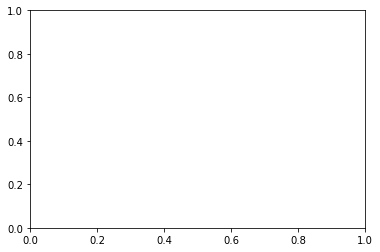

In [84]:
data['Perpetrator Age'].hist()

In [ ]:
data2[(data2["Crime Solved"]=="No") & (data2["Perpetrator Sex"]=='Unknown')].count()

## Decision Trees

In [3]:
data2 = data.copy()

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['Victim Race', 'Victim Ethnicity','Perpetrator Race'
                ,'Perpetrator Ethnicity','Perpetrator Sex','Victim Sex','Weapon'])
df_binary = encoder.fit_transform(data2)

In [4]:
print(df_binary)

        Record ID Agency Code      Agency Name       Agency Type        City  \
0               1     AK00101        Anchorage  Municipal Police   Anchorage   
1               2     AK00101        Anchorage  Municipal Police   Anchorage   
2               3     AK00101        Anchorage  Municipal Police   Anchorage   
3               4     AK00101        Anchorage  Municipal Police   Anchorage   
4               5     AK00101        Anchorage  Municipal Police   Anchorage   
...           ...         ...              ...               ...         ...   
638449     638450     WY01500      Park County           Sheriff        Park   
638450     638451     WY01700  Sheridan County           Sheriff    Sheridan   
638451     638452     WY01701         Sheridan  Municipal Police    Sheridan   
638452     638453     WY01800  Sublette County           Sheriff    Sublette   
638453     638454     WY01902     Rock Springs  Municipal Police  Sweetwater   

          State  Year      Month  Incid

In [ ]:
feature_cols = ['Victim Race', 'Victim Ethnicity', 'Victim Age', 'Perpetrator Age','Perpetrator Race'
                ,'Perpetrator Ethnicity','Perpetrator Sex','Victim Sex','Weapon']
X = data[feature_cols] # Features
y = data['Relationship'] # Target variable

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['Victim Race', 'Victim Ethnicity', 'Victim Age', 'Perpetrator Age','Perpetrator Race'
                ,'Perpetrator Ethnicity','Perpetrator Sex','Victim Sex','Weapon'])
le.transform(["tokyo", "tokyo", "paris"]) 

ValueError: y contains previously unseen labels: ['paris', 'tokyo']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

NameError: name 'train_test_split' is not defined

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [7]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

/home/jupyter-ehren/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


ModuleNotFoundError: No module named 'pydotplus'

## Application/problem
    - to know the unknown values 
    - why for better and accurate reporting of trends and making more informed decisions 
    - solution to FBI to recognize who is the perpetrator 

In [ ]:
# delete the unknowns to know the unknows 
# accurracy unknown 
# build the unknown perpetrator profile 